In [3]:
from zipfile import ZipFile
from PIL import Image
from PIL import ImageDraw, ImageFont
import pytesseract
import cv2 as cv
import numpy as np


def texts(image):
    text = pytesseract.image_to_string(image)
    return text.lower()

    
def getface(image):
    lst = []
    face_cascade = cv.CascadeClassifier("haarcascade_frontalface_default.xml")
    i = Image.open(image)
    img = np.array(i)
    gray = cv.threshold(img, 185, 255, cv.THRESH_BINARY)[1]
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for x, y, w, h in faces:
        im1 = i.crop((x, y, x+w, y+h)) 
        lst.append(im1) 
    return lst    


def cs(lst):
    first = lst[0]
    contact_sheet = Image.new(first.mode,(500, 200))
    x=0
    y=0
    for i in lst:
        sz= (100,100)
        i.thumbnail(sz)
        contact_sheet.paste(i,(x,y))
        if x+first.width==contact_sheet.width:
            x=0
            y=y+first.height
        else:
            x=x+first.width
    display(contact_sheet)        
    

def main(zipfil):
    word = input("Enter the word to search: ")
    with ZipFile(zipfil) as myzip:
        for img in myzip.infolist():
            name = img.filename
            with myzip.open(img) as myfile:
                image = Image.open(myfile)
                if word.lower() in texts(image):
                    faces = getface(myfile)
                    print(f"Result found in file {name}")
                    if len(faces)==0:
                        print("But there were no faces in file!")
                    else:
                        cs(faces)
                else:
                    print(f"Word not found in image {name}")
                
            
            
    
    
    

Enter the word to search: mark
Result found in file a-0.png


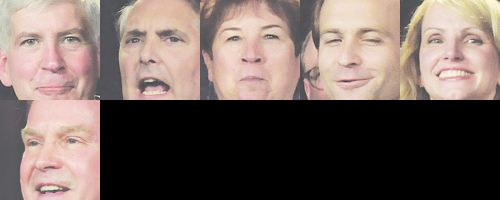

Result found in file a-1.png


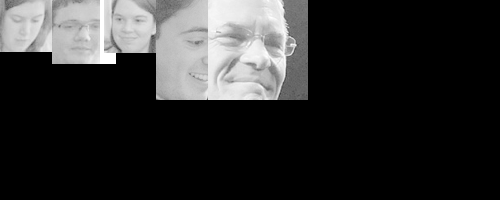

In [ ]:
%%time
main("small_img.zip")